# Welcome! 

## The learning continues! 

This time we're going to use some more advanced code, based on Keith Galli's Python Plotting Tutorial w/ Matplotlib & Pandas (Line Graph, Histogram, Pie Chart, Box & Whiskers) - [Video on youtube](https://www.youtube.com/watch?v=0P7QnIQDBJY&ab_channel=KeithGalli)

If in any cell you feel lost, check the documentation [here](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) 


we need to import the libraries again

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


We will be using two datasets in this notebook let's load them

In [17]:
gas = pd.read_csv('gas_prices_across_countries.csv')

The file it's in the same directory as the notebook, this makes it so i don't have to input the whole file path into read_csv()

The first thing we're going to do with the csv is try to understand it, obviously by reading it! 

In [18]:
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


Let's make a simple plot

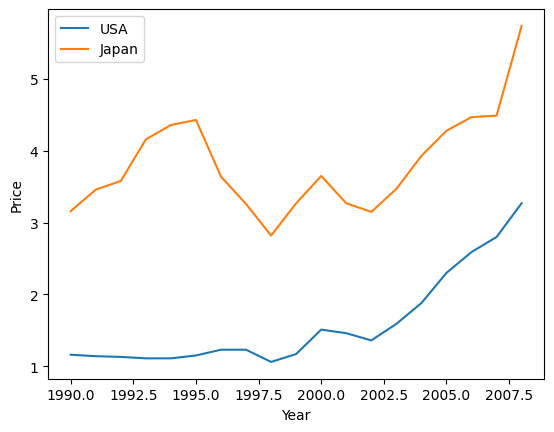

In [19]:
plt.plot(gas.Year, gas.USA, label= 'USA')
plt.plot(gas.Year, gas.Japan, label='Japan')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

The same plot but calling the columns in brackets

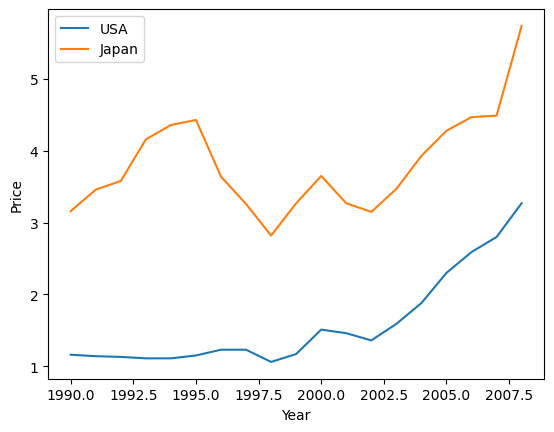

In [20]:
plt.plot(gas['Year'], gas['USA'], label= 'USA')
plt.plot(gas['Year'], gas['Japan'], label='Japan')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

New Title

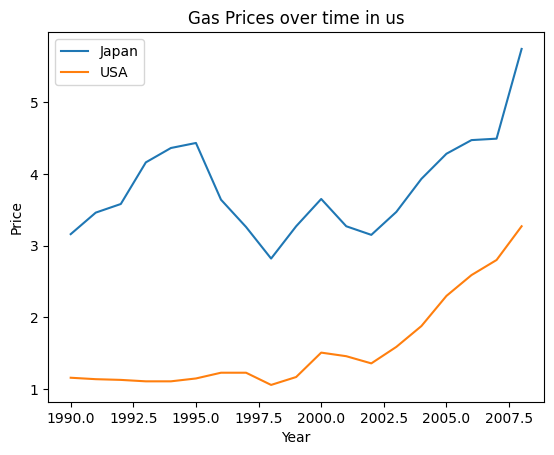

In [21]:
plt.plot(gas['Year'], gas['Japan'], label='Japan')
plt.plot(gas['Year'], gas['USA'], label= 'USA')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

let's change the ticks to the values of the Year column

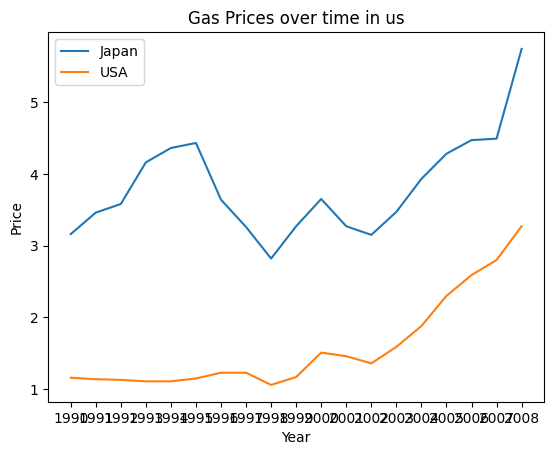

In [26]:
plt.plot(gas['Year'], gas['Japan'], label='Japan')
plt.plot(gas['Year'], gas['USA'], label= 'USA')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas['Year'])
plt.legend()
plt.show()

That doesn't seem ok, lets change it again, we need to feed the xticks function a list of values 

In [34]:
print(gas['Year']) # this is too big
print('Filtered list', gas['Year'][::2], sep= '\n')

0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
Name: Year, dtype: int64
Filtered list
0     1990
2     1992
4     1994
6     1996
8     1998
10    2000
12    2002
14    2004
16    2006
18    2008
Name: Year, dtype: int64


let's input the filtered list

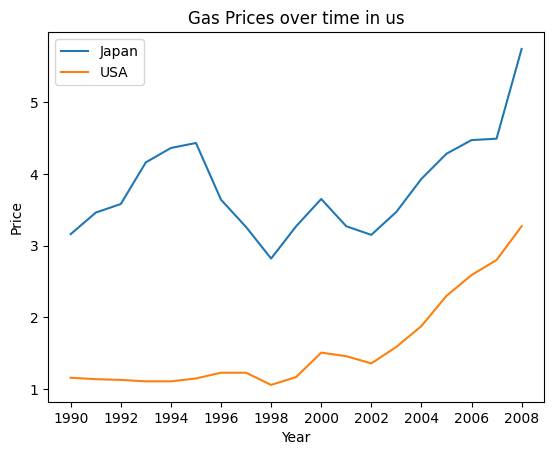

In [35]:
plt.plot(gas['Year'], gas['Japan'], label='Japan')
plt.plot(gas['Year'], gas['USA'], label= 'USA')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas['Year'][::2]) # between fisrt and last, but only mukltiples of 2 
plt.legend()
plt.show()

Graph customization using the short hand notation

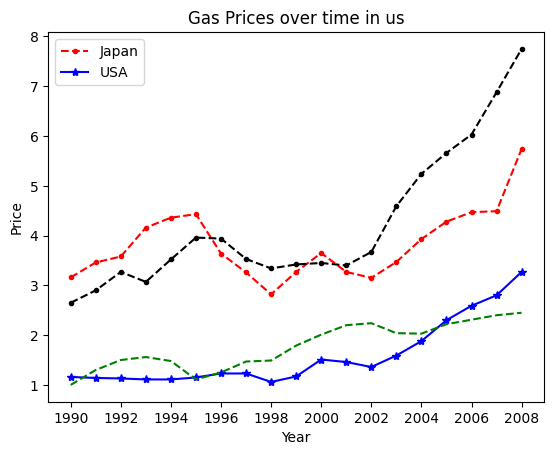

In [39]:
plt.plot(gas['Year'], gas['Japan'],'r.--', label='Japan')
plt.plot(gas['Year'], gas['USA'], 'b*-', label= 'USA')
plt.plot(gas['Year'], gas['Mexico'], 'g--')
plt.plot(gas['Year'], gas['Germany'], 'k--.')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas['Year'][::2])
plt.legend()
plt.show()

Now lets show many plots more efficiently by iterating them

In [41]:
# First let's try to create a list with all the countries
for country in gas:
    print(country)

Year
Australia
Canada
France
Germany
Italy
Japan
Mexico
South Korea
UK
USA


Now let's create a plot iterating the columns, taking into account to exclude the Year column

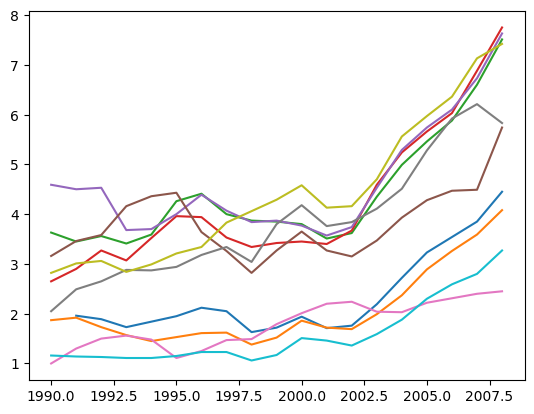

In [43]:
for country in gas:
    if country != 'Year':
        plt.plot(gas['Year'], gas[country])

Merge codes

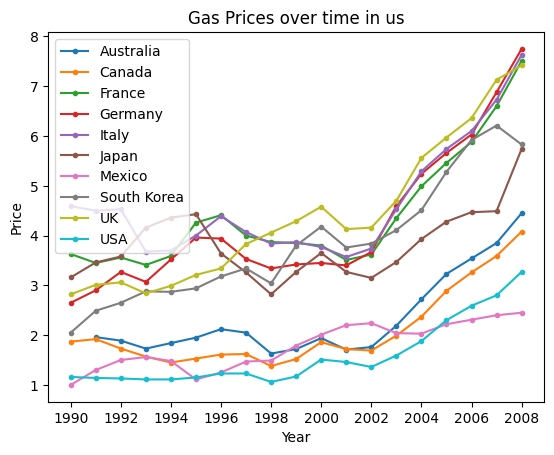

In [45]:
for country in gas:
    if country != 'Year':
        plt.plot(gas['Year'], gas[country], label=country, marker= '.')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas['Year'][::2])
plt.legend()
plt.show()

Another way to filter columns and plot at the same time 

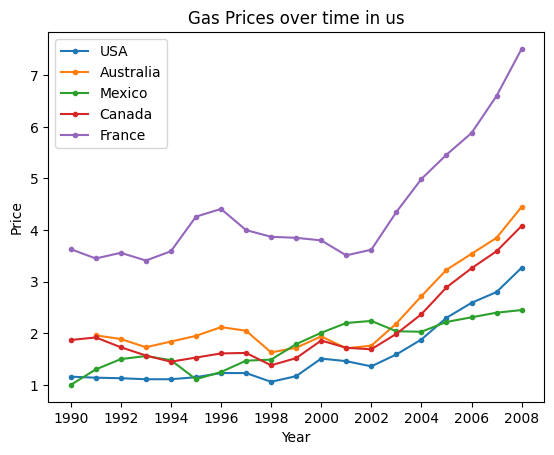

In [47]:
places = ['USA', 'Australia', 'Mexico', 'Canada', 'France']
for country in places:
        plt.plot(gas['Year'], gas[country], label=country, marker= '.')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas['Year'][::2])
plt.legend()
plt.show()

What if we wanted to extend the x axis further than our values? 

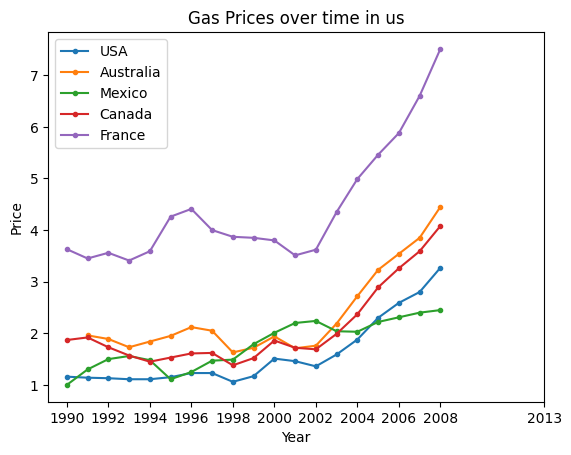

In [ ]:
places = ['USA', 'Australia', 'Mexico', 'Canada', 'France']
for country in places:
        plt.plot(gas['Year'], gas[country], label=country, marker= '.')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas['Year'][::2].tolist() + [2013])
plt.legend()
plt.show()

We made a nice image, lets scale it and save it, first we gonna define the x and y values of the pixels for the img, using plt.figure(figsize=(3, 2)) 
then we re going to save it using a different dpi setting, for this example 200, this makes a (200*3, 200*2) = (600, 400)

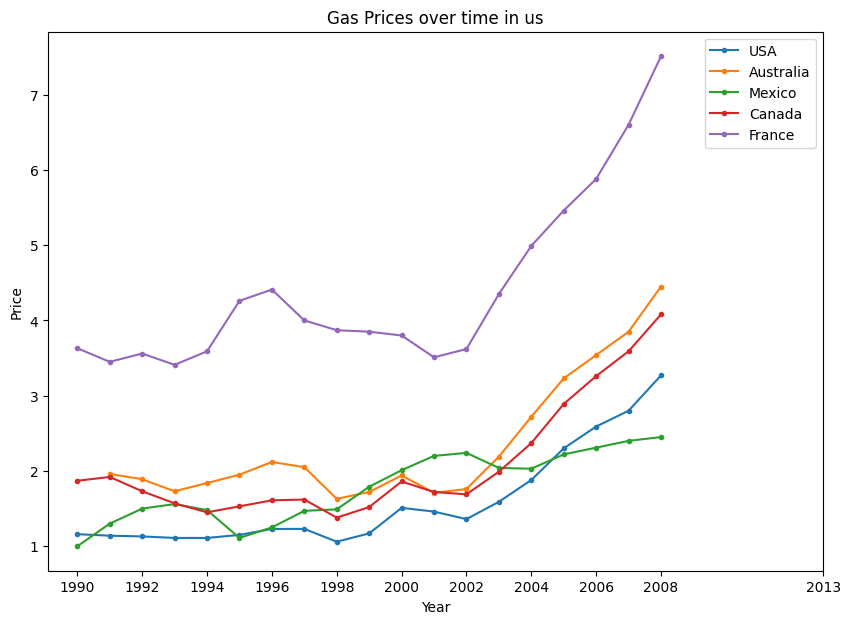

In [57]:
plt.figure(figsize=(10, 7))
places = ['USA', 'Australia', 'Mexico', 'Canada', 'France']
for country in places:
        plt.plot(gas['Year'], gas[country], label=country, marker= '.')
plt.title('Gas Prices over time in us')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(gas['Year'][::2].tolist() + [2013])
plt.legend()
plt.savefig('gas_prices_figure', dpi=200)
plt.show()

# Now let's open the FIFA dataset from Kaggle 



In [58]:
playerbase = pd.read_csv('soccer_players_fifa_stats.csv')

Check it out

In [60]:
playerbase.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Making a histogram.
Note: by default the histogram will populate the other axis with a count

<function matplotlib.pyplot.show(close=None, block=None)>

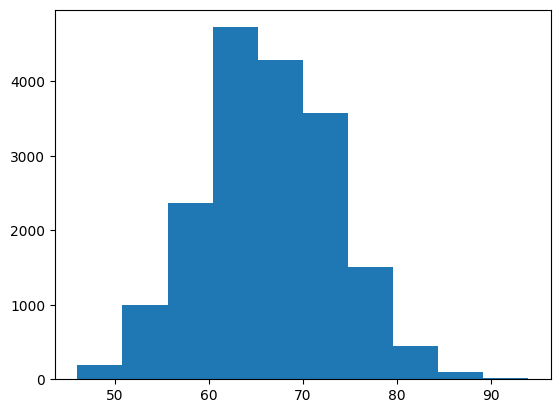

In [62]:
plt.hist(playerbase['Overall'])
plt.show

Look how the histogram is set based on the x axis, these values are called bins, and be altered

<function matplotlib.pyplot.show(close=None, block=None)>

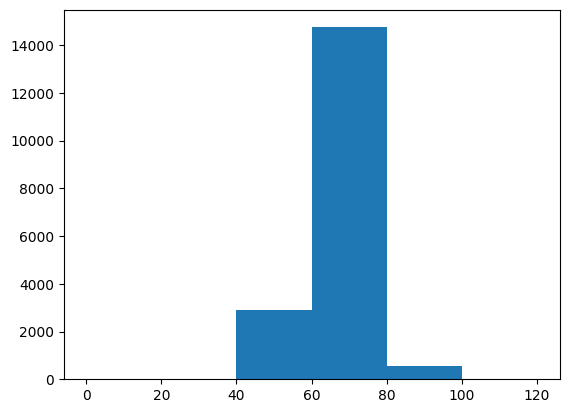

In [65]:
item_bins = [0, 20, 40, 60, 80, 100, 120]
plt.hist(playerbase['Overall'], bins=item_bins)
plt.show


Changing the filter, and customizing the graph

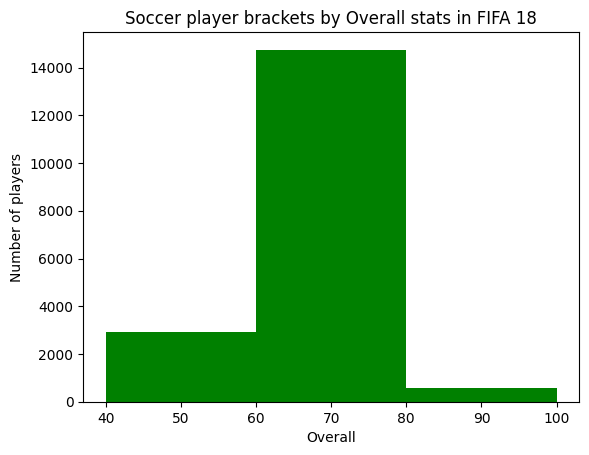

In [70]:
item_bins = [40, 60, 80, 100]
plt.hist(playerbase['Overall'], bins=item_bins, color= 'Green')
plt.title('Soccer player brackets by Overall stats in FIFA 18')
plt.ylabel('Number of players')
plt.xlabel('Overall')
plt.show()


Now that we've made histograms, let's move into pie charts

In [72]:
playerbase.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Pie charts recieve a list of values as the main source, like [10, 30, 50]

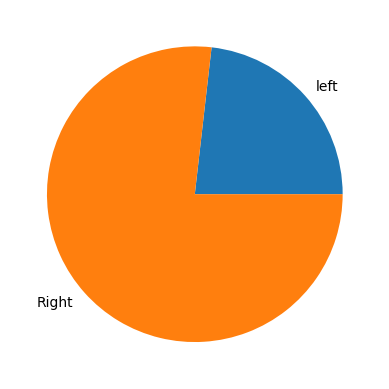

In [87]:
left_foot = playerbase.loc[playerbase['Preferred Foot'] == 'Left'].count()[0]
right_foot = playerbase.loc[playerbase['Preferred Foot'] == 'Right'].count()[0]
plt.pie([left_foot, right_foot])
plt.show()

Now let's customize the chart

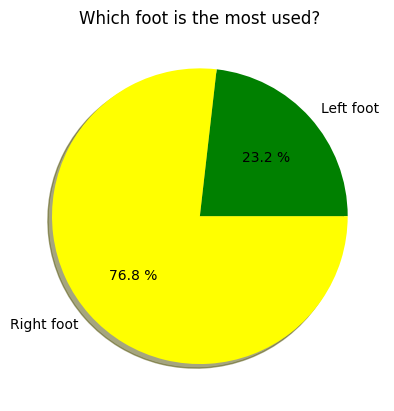

In [96]:
left_foot = playerbase.loc[playerbase['Preferred Foot'] == 'Left'].count()[0]
right_foot = playerbase.loc[playerbase['Preferred Foot'] == 'Right'].count()[0]
plt.pie([left_foot, right_foot], labels=['Left foot', 'Right foot'], colors=['green', 'yellow'], shadow=True, autopct='%.1f %%') 
# shadow = true/false, draw a little shadow on hte graph, autopct= '%.[Decimal places]f %%', show a percentage of distribution of the data
plt.title('Which foot is the most used?')
plt.show()

Another way to do it: using lists

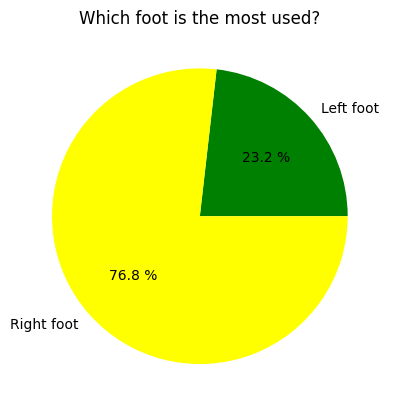

In [97]:
left_foot = playerbase.loc[playerbase['Preferred Foot'] == 'Left'].count()[0]
right_foot = playerbase.loc[playerbase['Preferred Foot'] == 'Right'].count()[0]
foot_labels=['Left foot', 'Right foot']
colors=['green', 'yellow']
shadow=True
autopct='%.1f %%'
plt.pie([left_foot, right_foot], labels=foot_labels, colors= colors, autopct= autopct ) 
# shadow = true/false, draw a little shadow on hte graph, autopct= '%.[Decimal places]f %%', show a percentage of distribution of the data
plt.title('Which foot is the most used?')
plt.show()